<a href="https://colab.research.google.com/github/minseokey/Data_Science/blob/main/Data_Science_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def kmeans(k,points):
  prev_assignmnet = []
  #points의 행렬 형태인 [a,b]중에 하나를 골라준다.
  centroids = points[np.random.choice(points.shape[0],replace = False,size = k)]
  for epoch in range(10):
    #assignmnets = 모든 점을 각각의 centroids - point의 내적값이 가장 작은걸로 골라주고, 그걸 다 더해서 리스트화
    assignments = [assign(p, centroids, k) for p in points]
    #
    centroids = compute_centroids(assignments,points,k)

    if prev_assignmnet == assignments:
        break
    prev_assignmnet = assignments
  return assignments,centroids


In [60]:
def assign(point, centroids, k):
  return min(range(k), key = lambda i: np.dot(centroids[i] - point,centroids[i]- point))

In [61]:
def compute_centroids(assignments,points,k):
  vec_sum = [np.zeros(len(points[0]))for _ in range(k)]
  counts = [0]*k
  for i, p in zip(assignments, points):
    vec_sum[i] += p
    counts[i] += 1
  return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]

In [62]:
k = 3
points = [np.random.randn(k) for _ in range(80)]
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points)
assignments, centroids = kmeans(k, points)

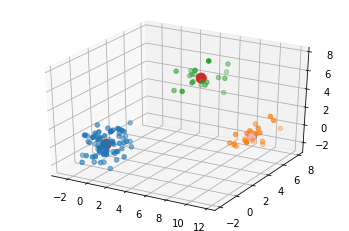

In [63]:
fig = plt.figure()
ax = fig.gca(projection='3d')
clusters = [[] for _ in range(k)]
for a, p in zip(assignments, points):
 clusters[a].append(p)
for cluster in clusters:
 ax.scatter(*zip(*cluster))
#  ax.scatter(cluster[:0],cluster[:1],cluster[:2])
ax.scatter(*zip(*centroids), s=100)
plt.show()

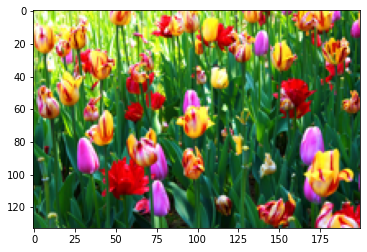

In [64]:
from PIL import Image
im = Image.open("flower-g15a678ba5_1920.jpg")
width = 200
height = im.height * width // im.width
im = im.resize((width, height))
plt.imshow(im)
plt.show()

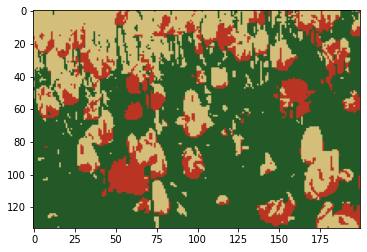

In [65]:
pixels = np.array(im).reshape(-1,3)
assignments, centroids= kmeans(3, pixels)
for a, i in zip(assignments, range(pixels.shape[0])):
 pixels[i] = centroids[a]
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()